# BIA 6304 Predictive Models Fall 2017
## Assignment 1
## Notebook 1
### Stuent:  Leonardo Ji
### 10/24/2017

### Import Standard packages

In [1]:
#Add packages
#These are my standard packages I load for almost every project
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', 15000) #important for getting all the text
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
#Notice I did not load my Datamining packages yet (ie decision tree). I will do that as I use them.

#### Notebook 1: Warm up on Munging and Pre-procesing using Pandas, Matplotlib (and a little Sklearn).
Consider the data collected for a set of cars.  This data is available in .csv format in the file auto.csv . Use Python’s Pandas (as well as other libraries as mentioned) to perform the following tasks. You can look at the video store data and code as an example (it is very similar)..  You can check the Pandas documentation as well as many on-line blogs for assistance. http://pandas.pydata.org/pandas-docs/stable/
1.	Read in auto.csv file into a dataframe, and call it Auto. 
2.	Replace any missing values with the median value of the variable (feature).
3.	Explore the general characteristics of the data, by computing the means and standard deviations of the numerical attributes, as well as the distributions of “drive type” and “fuel type” (both are categorical).  You can do this for each individual variable separately or a function to compute for the entire data frame (or both). 
4.	Use z-score normalization to standardize the values of the Weight attribute. Show the results side-by-side with the original Weight attribute. [Do not change the original Weight attribute in the table.] Alternatively you may choose to use a [0,1] Min-Max Normalization.You can create this by a manual calculation or use the sklearn.preprocessing package. http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
5.	Convert the categorical variables into dummies. Note that this requires converting each categorical attribute into multiple attributes (dummies) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record. 
6.	Perform basic correlation analysis a correlation matrix) among the attributes. Perform both numeric and visual correlation outputs.
7.	Using the new converted dataset- run a PCA. How much variation is captured in 3 Principle Components? (May I suggest you use this function 
from sklearn.decomposition import PCA
8.	Using Matplotlib library (or seaborn or both), create a scatter plot of the (non-normalized) Weight attribute relative to MPG. Be sure that your plot contains appropriate labels for the axes. 
9.	Using the hist function in Matplotlib (or Seaborn or both), create histograms for (non-normalized) Luggage (using 6 bins) and MPG (using 7 bins).
10.	Perform a cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables. This requires the aggregation of the occurrences of each genre separately for each gender. You can use whatever appropriate data structure you which to store the results, but you can display it as as a 2 x 2 table with entries representing the counts. Then, use Matplotlib to create a bar chart graph to visualize of the relationships between these sets of variables (comparing Regular and Premium customer across the two drive types). Your chart should contain appropriate labels for axes. 
11.	Create a new dataframe where fuel is “regular” AND MPG is over 21. Call it Auto_sub. Label each section using markup to state what you are doing and what you see.

Your output for the above should look nice and professional AND well annotated. No pages and pages of junk output. Use heads, tails, and contain output so it looks good. A large part of the grade for this section is professionalism in a Juypter notebook. 
For this part, you need a .html file of your code and output. 


In [2]:
cd C:\\Users\\lj015625\\Desktop\\Predictive Model\\Pred_Models_git\\Week 1

C:\Users\lj015625\Desktop\Predictive Model\Pred_Models_git\Week 1


In [3]:
auto = pd.read_csv("data/AUTO.csv", sep=",", encoding = 'utf8')
print(auto.shape)
auto.head()

(106, 18)


,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31,Regular,13.2,172,101,67,39,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22,Premium,17.1,193,108,70,40,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22,Regular,17.5,195,109,73,40,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20,Regular,17.5,200,112,74,42,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21,Regular,18.5,207,114,75,43,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


### Fill missing values with column means

In [4]:
auto = auto.where(pd.notnull(auto), auto.mean(), axis='columns')

### Exploratory data analysis

In [5]:
auto.describe()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,21.292453,17.883019,187.594340,107.632075,70.915094,39.849057,53.891509,25.230769,56.471698,41.254717,4.287736,54.745283,28.363208,3.023585
std,3.769469,3.425714,12.493639,7.014713,3.237041,2.797252,5.747465,18.191825,3.041640,1.021775,1.279784,7.110437,2.196895,1.370405
min,13.000000,12.100000,152.000000,93.000000,66.000000,34.000000,46.500000,10.000000,51.500000,39.000000,1.500000,6.500000,22.500000,0.000000
25%,19.000000,15.825000,178.000000,103.000000,68.000000,38.000000,50.000000,14.000000,54.000000,40.500000,3.500000,52.625000,27.000000,2.000000
50%,21.000000,17.400000,188.000000,107.000000,70.000000,40.000000,51.000000,16.000000,56.000000,41.000000,4.500000,56.000000,28.500000,3.000000
75%,23.000000,19.000000,195.000000,112.000000,73.000000,41.000000,60.000000,30.750000,58.500000,42.000000,5.000000,57.000000,30.000000,4.000000
max,31.000000,30.000000,226.000000,139.000000,80.000000,49.000000,70.500000,76.000000,63.500000,44.000000,8.000000,64.500000,34.000000,6.000000


#### Need to remove spaces to prevent creating two dummy "Fuel Type_Regular" and "Fuel Type_Regular "

In [6]:
# perform data transformation. remove spaces
for col in auto.columns[1:]:
    attName = col
    dType = auto[col].dtype
    if dType == object:
        # strip out spaces from 'Fuel Type_Regular '
        auto[col] = auto[col].str.strip()
        
oldAuto = auto

#### Convert weights from strings to numbers then Z scores normalization.  First I need to remove "," from strings before converting. Z normalization is defined as:
$$Z = \frac{X-\mu}{\sigma}$$

In [7]:
#to convert into numbers
auto['weight'] = [int(x.replace(',','')) for x in auto['Weight (lbs)']]
auto['weight_zscore'] = (auto.weight-auto.weight.mean()) /auto.weight.std()
auto[['Weight (lbs)','weight','weight_zscore']]

,Weight (lbs),weight,weight_zscore
0,"2,635",2635,-1.369178
1,"3,460",3460,-0.066795
2,"3,350",3350,-0.240446
3,"3,640",3640,0.217362
4,"3,880",3880,0.596237
5,"3,325",3325,-0.279912
6,"2,795",2795,-1.116595
7,"3,495",3495,-0.011542
8,"3,350",3350,-0.240446
9,"3,075",3075,-0.674574


In [8]:
auto=auto.drop('Weight (lbs)', axis=1)
auto.columns

Index(['Name', 'Drive Type', 'Mileage (mpg)', 'Fuel Type', 'Capacity (gal)',
       'Length (inches)', 'Wheel Base (inches)', 'Width (inches)',
       'Turning Circle (feet)', 'Door Top (inches)', 'Luggage (cu. ft.)',
       'Front Shoulder (inches)', 'Front Leg Room (inches)',
       'Front Head Room (inches)', 'Rear Shoulder (inches)',
       'Rear Leg Room (inches)', 'Rear Head Room (inches)', 'weight',
       'weight_zscore'],
      dtype='object')

### Perform data transformation. Creates dummies of any categorical feature.

In [9]:
for col in auto.columns[1:]:
    attName = col
    dType = auto[col].dtype
    missing = pd.isnull(auto[col]).any()
    uniqueCount = len(auto[attName].value_counts(normalize=False))
    # discretize (create dummies)
    if dType == object:
        auto = pd.concat([auto, pd.get_dummies(auto[col], prefix=col)], axis=1)
        del auto[attName]
auto.columns

Index(['Name', 'Mileage (mpg)', 'Capacity (gal)', 'Length (inches)',
       'Wheel Base (inches)', 'Width (inches)', 'Turning Circle (feet)',
       'Door Top (inches)', 'Luggage (cu. ft.)', 'Front Shoulder (inches)',
       'Front Leg Room (inches)', 'Front Head Room (inches)',
       'Rear Shoulder (inches)', 'Rear Leg Room (inches)',
       'Rear Head Room (inches)', 'weight', 'weight_zscore',
       'Drive Type_Front', 'Drive Type_Rear', 'Fuel Type_Premium',
       'Fuel Type_Regular'],
      dtype='object')

In [10]:
auto.head()

,Name,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),...,Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),weight,weight_zscore,Drive Type_Front,Drive Type_Rear,Fuel Type_Premium,Fuel Type_Regular
0,Acura Integra,31,13.2,172,101,67,39,47.5,13.0,51.5,...,2.0,46.5,25.0,0.5,2635,-1.369178,1,0,0,1
1,Acura TL,22,17.1,193,108,70,40,50.0,14.0,56.0,...,2.5,55.0,27.0,2.0,3460,-0.066795,1,0,1,0
2,Buick Century,22,17.5,195,109,73,40,50.5,17.0,58.0,...,5.0,57.0,30.0,2.0,3350,-0.240446,1,0,0,1
3,Buick LeSabre,20,17.5,200,112,74,42,51.0,18.0,59.5,...,5.0,58.0,27.5,4.5,3640,0.217362,1,0,0,1
4,Buick Park Avenue,21,18.5,207,114,75,43,51.0,19.0,59.5,...,6.0,58.5,31.5,3.0,3880,0.596237,1,0,0,1


### correlation analysis using correlation matrix.

In [11]:
auto.corr()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),weight,weight_zscore,Drive Type_Front,Drive Type_Rear,Fuel Type_Premium,Fuel Type_Regular
Mileage (mpg),1.000000,-0.787515,-0.387151,-0.512751,-0.578650,-0.571132,-0.771332,-0.633763,-0.607314,0.053420,-0.236747,-0.269556,-0.274588,-0.654005,-0.875434,-0.875434,0.434247,-0.434247,-0.069210,0.069210
Capacity (gal),-0.787515,1.000000,0.505427,0.660131,0.678437,0.526678,0.752458,0.731209,0.722434,-0.014806,0.274185,0.213711,0.371609,0.647434,0.888074,0.888074,-0.355375,0.355375,0.134342,-0.134342
Length (inches),-0.387151,0.505427,1.000000,0.869492,0.832541,0.684696,0.117489,0.261723,0.787516,0.268169,0.203634,0.203753,0.530583,0.200537,0.550863,0.550863,-0.077100,0.077100,0.062718,-0.062718
Wheel Base (inches),-0.512751,0.660131,0.869492,1.000000,0.791321,0.641709,0.411330,0.484309,0.790025,0.232445,0.294628,0.116297,0.407676,0.361039,0.678488,0.678488,-0.274368,0.274368,0.066904,-0.066904
Width (inches),-0.578650,0.678437,0.832541,0.791321,1.000000,0.642269,0.403390,0.464229,0.909002,0.091544,0.294469,0.400622,0.501899,0.416956,0.743765,0.743765,-0.166388,0.166388,0.035219,-0.035219
Turning Circle (feet),-0.571132,0.526678,0.684696,0.641709,0.642269,1.000000,0.413344,0.409763,0.624658,0.116876,0.251681,0.138586,0.340659,0.315220,0.625479,0.625479,-0.165816,0.165816,-0.133687,0.133687
Door Top (inches),-0.771332,0.752458,0.117489,0.411330,0.403390,0.413344,1.000000,0.824964,0.498575,-0.240942,0.388512,0.175732,0.065755,0.742755,0.777217,0.777217,-0.379593,0.379593,-0.066383,0.066383
Luggage (cu. ft.),-0.633763,0.731209,0.261723,0.484309,0.464229,0.409763,0.824964,1.000000,0.612608,-0.213479,0.372104,0.180357,0.293596,0.787849,0.674019,0.674019,-0.164088,0.164088,-0.148594,0.148594
Front Shoulder (inches),-0.607314,0.722434,0.787516,0.790025,0.909002,0.624658,0.498575,0.612608,1.000000,0.063630,0.329347,0.441564,0.550277,0.570227,0.762697,0.762697,-0.148338,0.148338,0.044993,-0.044993
Front Leg Room (inches),0.053420,-0.014806,0.268169,0.232445,0.091544,0.116876,-0.240942,-0.213479,0.063630,1.000000,0.120034,-0.052595,0.444186,-0.191373,0.022551,0.022551,-0.155850,0.155850,0.040158,-0.040158


#### Two correlation plots.  The second plot using seaborn library is much better.

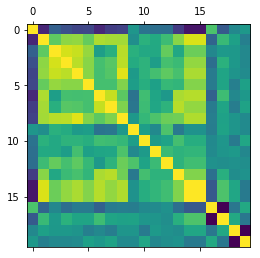

In [12]:
plt.matshow(auto.corr())

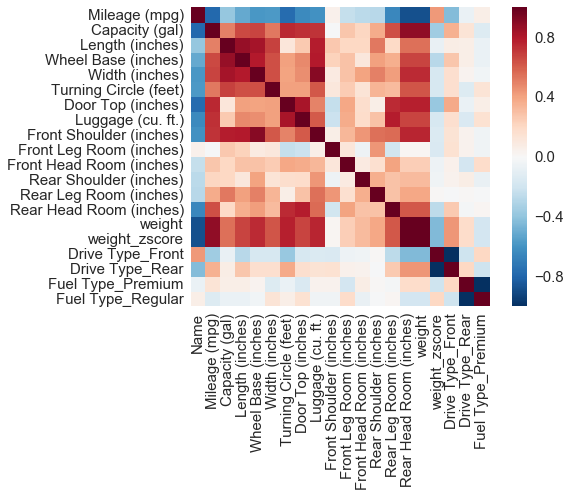

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
sns.set(font_scale=1.5)
hm = sns.heatmap(auto.corr(), 
            cbar=True,
            annot=False,
            square=True,
            fmt='.2f',
            yticklabels=auto.columns.values,
            xticklabels=auto.columns.values)
plt.show()

### PCA is dimension reduction technique to reduce number of variables to selected 3 principal components.  The 3 principal components explain 99% of the variance from the data.

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(auto.iloc[:,1:].values.tolist())

print( 'PCA Total Variance Explained: ' + str(sum(pca.explained_variance_ratio_)))


PCA Total Variance Explained: 0.999811700658


### Scatter plot of Vehicle Weights vs. Mileages (mpg).  The lighter vehicles have higher mpg.

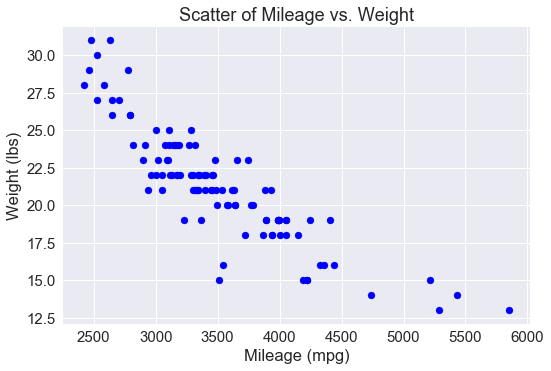

In [15]:
plt.scatter(auto['weight'], auto['Mileage (mpg)'], c='blue', marker='o', label='Inliers')
plt.xlabel('Mileage (mpg)')
plt.ylabel('Weight (lbs)')
plt.title('Scatter of Mileage vs. Weight')

plt.tight_layout()
# plt.savefig('./figures/ransac_fit.png', dpi=300)
plt.show()

### Histogram of Luggage spaces.  Most vehicles have less than 20 luggage spaces.

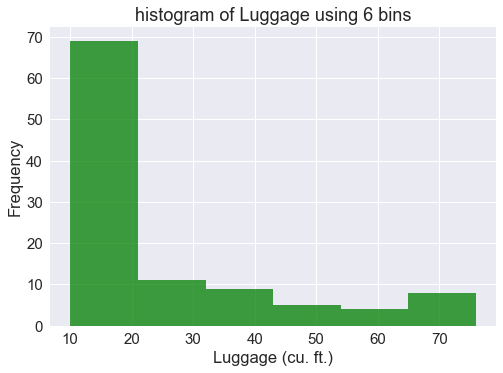

In [16]:
n, bins, patches = plt.hist(auto['Luggage (cu. ft.)'], 6, facecolor='green', alpha=0.75)
plt.title('histogram of Luggage using 6 bins')
plt.xlabel("Luggage (cu. ft.)")
plt.ylabel("Frequency")
plt.show()

### Histogram of Mileage (mpg).  Most vehicles are between 20 to 25 Mileage (mpg).

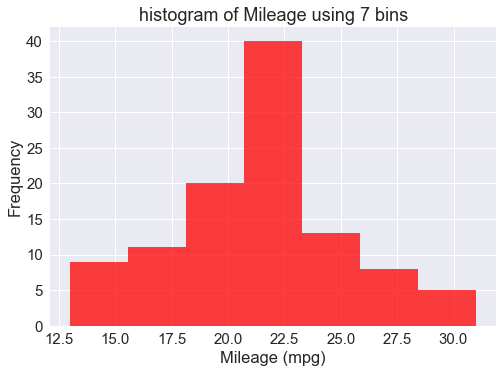

In [17]:
n, bins, patches = plt.hist(auto['Mileage (mpg)'], 7, facecolor='red', alpha=0.75)
plt.title('histogram of Mileage using 7 bins')
plt.xlabel("Mileage (mpg)")
plt.ylabel("Frequency")
plt.show()

### Cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables.  Most of the vehicles are Front wheel drive and Regular fuel type.

In [18]:
auto_cross= pd.crosstab(oldAuto['Drive Type'], oldAuto['Fuel Type'], colnames=['Fuel Type'], rownames=['Drive Type'])
print(auto_cross)

Fuel Type   Premium  Regular
Drive Type                  
Front            11       70
Rear              8       17


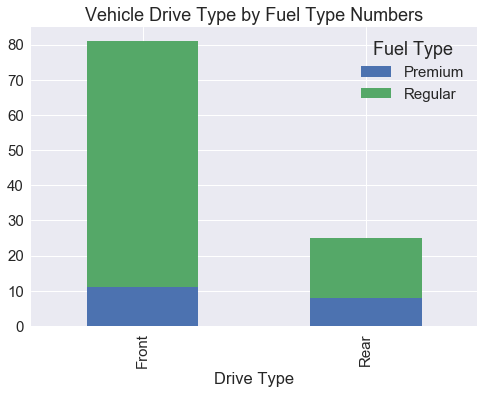

In [19]:
#Bar plot 
auto_cross.plot(kind='bar', stacked=True)
plt.title('Vehicle Drive Type by Fuel Type Numbers')

### Create a subset of vehicles with Regular fuel type and mileage above 21.  There are 41 vehicles fits these criteria.  Verified the results are the same using:
1. Lambda function.
2. Two subset.

In [236]:
auto_sub = oldAuto[oldAuto.apply(lambda oldAuto: oldAuto['Fuel Type'] == 'Regular' and oldAuto['Mileage (mpg)'] > 21, axis=1)]
auto_sub.shape

(41, 20)

In [235]:
auto_sub2 = oldAuto[oldAuto['Fuel Type'] == 'Regular']
auto_sub2 = auto_sub2[auto_sub2['Mileage (mpg)'] > 21]
auto_sub2.shape

(41, 20)

### Summary
Performed Data Analysis on auto data set.
1. Replace missing values with column means. 
2. Convert weights to numbers and Z scores normalization.
3. Strip out spaces from fuel type columns. Then convert categorical variables to dummy binary numerical variables.
4. Create correlation matrix and correlation plot.
5. Use PCA dimensional reduction technique to reduce features to 3 principal components that explains 99% of the variance.
6. Scatter plot of Vehicle Weights vs. Mileages (mpg).
7. Histogram of Luggage spaces. Most vehicles have less than 20 luggage spaces.
8. Histogram of Mileage (mpg). Most vehicles are between 20 to 25 mpg.
9. Cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables. Most of the vehicles are Front wheel drive and Regular fuel type.
10. Create a subset of vehicles with Regular fuel type and mileage above 21. There are 41 vehicles fits these criteria.


# END